<a href="https://colab.research.google.com/github/francescakaganzi/MachineLearning/blob/main/Insurance_Claim_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Lab Assignment: Predictive Modeling for Insurance Claims**

Name: Francesca Kaganzi

Student no: 2300704669

Reg No: 2023/HD05/04669U



Objective:
Build a predictive model to determine if a building will have an insurance claim during a specific
period using building characteristics.


Step 1: Exploratory Data Analysis

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_selection import f_classif, SelectKBest
import os
%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Data Preprocessing
# Load data
train_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/train_data.csv')
test_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/test_data_copy.csv')

In [9]:
# Display information about the total number of Features and Observations
train_data.shape

(7160, 14)

In [8]:
# Display the top 5 rows of the Dataframe
train_data.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [6]:
# Statistical summary of the dataset
display(train_data.describe())

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [10]:
#Get the object types of the Feature Columns
train_data.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

Step 2: Data Preperation

*   Handle missing values appropriately (imputation or removal)
*   Encode categorical variables if necessary
*   Scale numerical variables if necessary

In [11]:
# Check for missing values
missing_values = train_data.isnull()  # or df.isna()

# Count missing values in each column
missing_count = missing_values.sum()
print(missing_count)

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64


In [12]:
# Split the variables into Categorical and Numerical
categorical_columns = ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
numerical_columns = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy']

In [13]:
# Impute missing values
# Create a SimpleImputer for mean imputation (you can also use 'median' instead of 'mean)
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply mean imputation to the selected numerical columns in train_data
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = numerical_imputer.transform(test_data[numerical_columns])

# Apply most frequent imputation to the selected categorical columns in train_data
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])
test_data[categorical_columns] = categorical_imputer.transform(test_data[categorical_columns])

In [14]:
# Encode the categorical variables
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.fit_transform(test_data[column])

In [15]:
# Scaling numerical variables
numerical_scaler = StandardScaler()

train_data[numerical_columns] = numerical_scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = numerical_scaler.transform(test_data[numerical_columns])

# Now train_data and test_data contain the preprocessed data, and you have not modified y_train or y_test, as they are the target variables.

Step 3: Feature Analysis

Plotting Feature Distributions


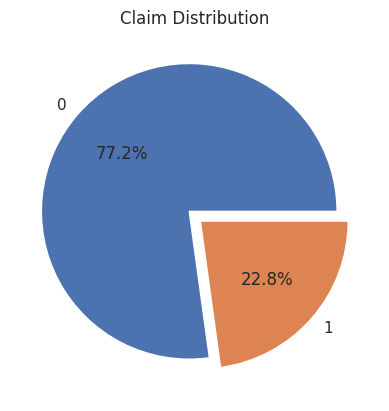

In [16]:
# Define the explode values to create a "pie slice" effect
dfexplode = (0.05, 0.05)
# Create a pie chart to visualize the distribution of 'Claim' values
plt.pie(train_data['Claim'].value_counts(), labels=['0', '1'], autopct='%1.1f%%', explode=dfexplode)
# Add a title to the pie chart
plt.title("Claim Distribution")
# Display the pie chart
plt.show()

The distribution of the claims shows that most of the insurance claims are rejected.

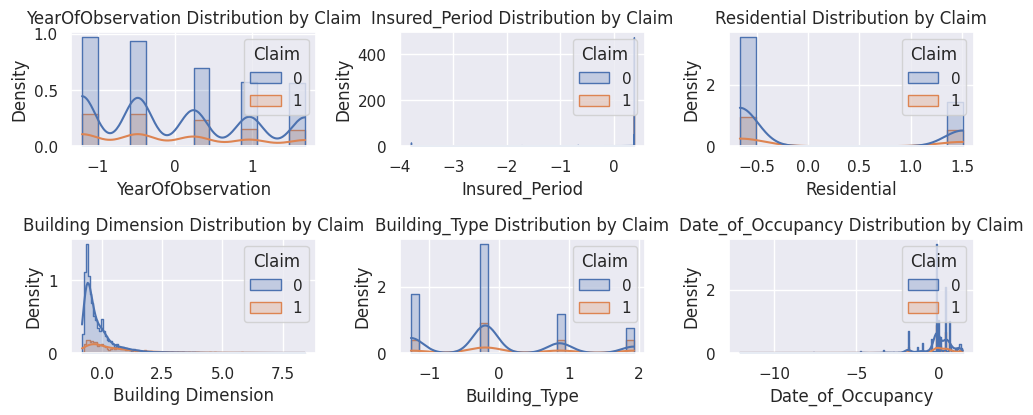

In [21]:
# Cross Analysis between Claim and Numerical Features
# Create a new figure with a specific size (10x10 inches)
plt.figure(figsize=(10, 10))

# Loop through the numerical columns for visualization
for i, column in enumerate(numerical_columns, 1):
    # Create subplots in a 5x3 grid (5 rows, 3 columns)
    plt.subplot(5, 3, i)
    # Create histograms to visualize the distribution of the numerical feature for different values of 'Claim'
    sns.histplot(data=train_data, x=column, hue='Claim', kde=True, element='step', stat='density')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column} Distribution by Claim')

# Adjust the layout for better spacing between subplots
plt.tight_layout()
# Display the figure containing the histograms
plt.show()


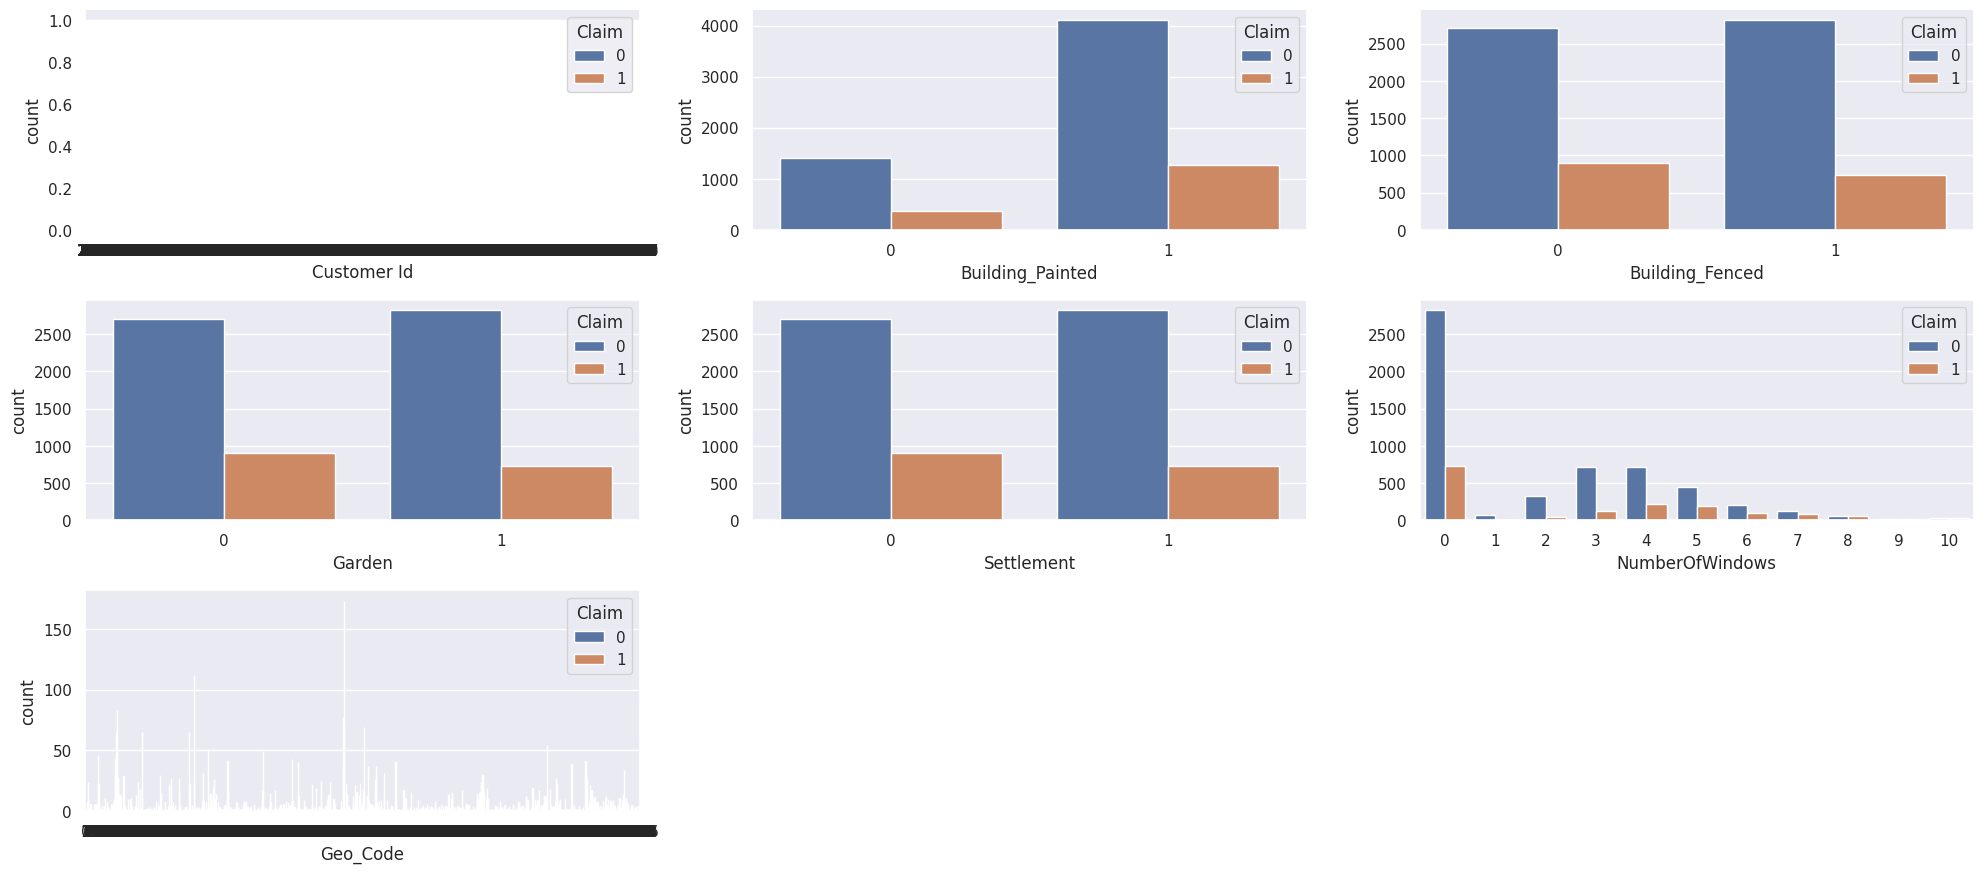

In [17]:
#Cross Analysis between Claim and Categorical Features
# Create a new figure with a specific size (20x20 inches)
plt.figure(figsize=(20, 20))
# Initialize locators for subplot positioning
locator1, locator2 = [0, 0]
# Loop through each categorical column for visualization
for column in categorical_columns:
    # Check if the current column is 'JobRole'
    if column == 'Claim':
        # Create a subplot that spans 3 columns (colspan=3) and 1 row (rowspan=1)
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        # Create a countplot for 'JobRole' with hue='Attrition'
        sns.countplot(x=column, hue='Claim', data=train_data)
        # Update the locator positions
        locator1 += 1
        locator2 = 0
        continue
    # Create a subplot within the 7x3 grid
    plt.subplot2grid((7, 3), (locator1, locator2))
    # Create a countplot for the current categorical column with hue='Attrition'
    sns.countplot(x=column, hue='Claim', data=train_data)
    # Update the locator position in the grid
    locator2 += 1
    # Check if a new row should start
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    # Check if all subplots have been created
    if locator1 == 7:
        break
# Adjust the layout for better spacing between subplots
plt.tight_layout()
# Display the figure containing the countplots
plt.show()

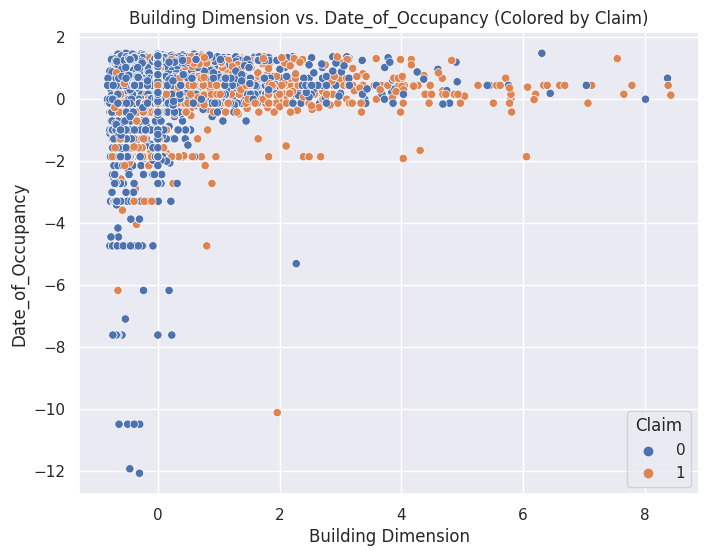

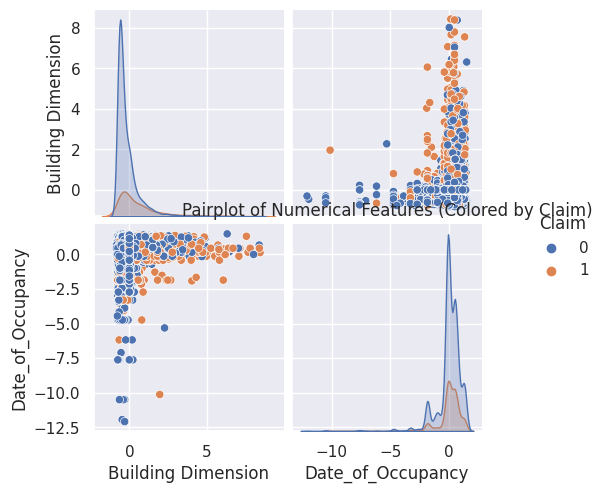

   Claim  Building Dimension
0      0           -0.160532
1      1            0.542899


In [20]:
# Scatterplot for 'Building Dimension' vs. 'Date_of_Occupancy'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='Building Dimension', y='Date_of_Occupancy', hue='Claim')
plt.title('Building Dimension vs. Date_of_Occupancy (Colored by Claim)')
plt.xlabel('Building Dimension')
plt.ylabel('Date_of_Occupancy')
plt.legend(title='Claim')
plt.show()

# Pairplot
sns.pairplot(train_data[['Building Dimension', 'Date_of_Occupancy', 'Claim']], hue='Claim')
plt.title('Pairplot of Numerical Features (Colored by Claim)')
plt.show()

# Groupby Comparisons (Example: Mean 'Building Dimension' by 'Claim')
grouped_claim = train_data.groupby('Claim')['Building Dimension'].mean().reset_index()
print(grouped_claim)

Insights



*   Possibility of class imbalance
*   Skewed data for building dimension and date of occupancy

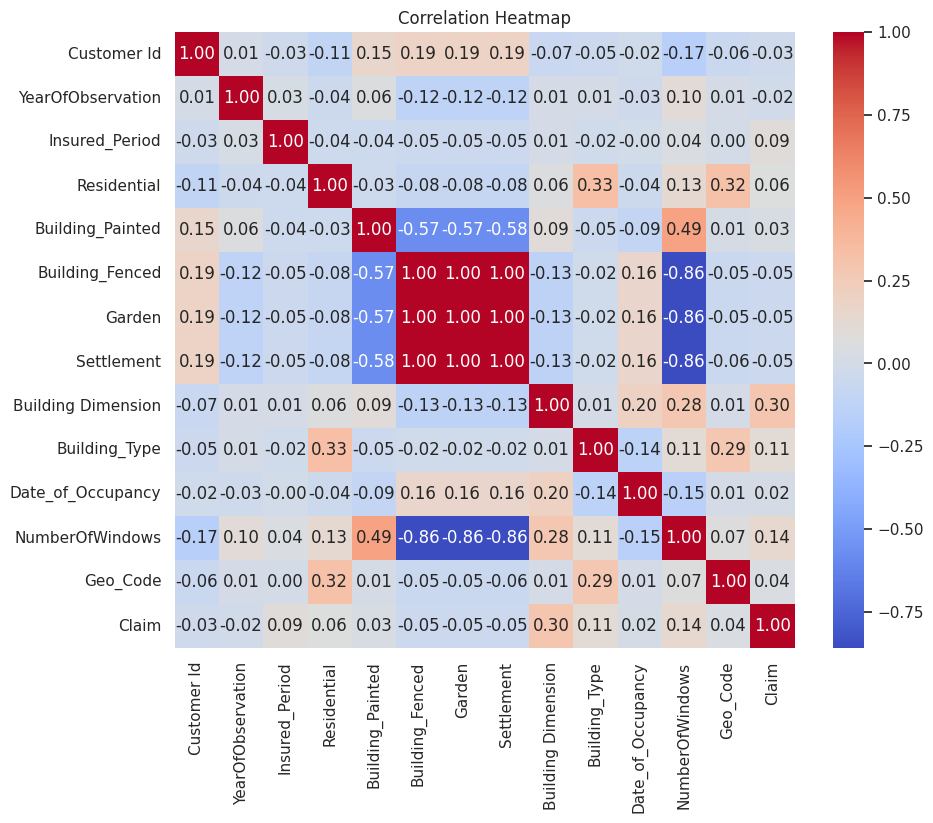

In [18]:
# Correlation Heatmap
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Step 4: Feature Selection

In [22]:
# Split data into features (X) and target variable (y)
X = train_data.drop('Claim', axis=1)
y = train_data['Claim']

In [23]:
#Using K variance to select the best features for the model
# Create a SelectKBest feature selection object
fs = SelectKBest(score_func=f_classif, k=10)
# Fit the feature selection object to the training data and select the top 15 features
X_fs = fs.fit_transform(X, y)
# Print the names of the selected features
print(f"Selected features: {fs.get_feature_names_out()}\n")
# Print the shape of the transformed feature matrix
print(f"Shape of X_fs: {X_fs.shape}")

Selected features: ['Customer Id' 'Insured_Period' 'Residential' 'Building_Fenced' 'Garden'
 'Settlement' 'Building Dimension' 'Building_Type' 'NumberOfWindows'
 'Geo_Code']

Shape of X_fs: (7160, 10)


Step 5: Model Building

In [24]:
# Model Evaluation
# Split the training data into a training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (5728, 10) (5728,)
Test (1432, 10) (1432,)


In [25]:
# Model Selection
# Initialize models
svm_model = SVC()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [26]:
# Spot Check Algorithms to Evaluate Models
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('Support Vector Machines', SVC(gamma='auto', probability=True)))

Step 6: Training the models and tuning the hyperparameters

In [27]:
# Evaluate each model in turn using Stratified Kfold for Cross Validation
# Create empty lists to store model results and model names
results = []
names = []
# Loop through a list of (model_name, model_instance) tuples
for name, model in models:
  # Print the parameters of the current model
    print(f'Parameters for {name}: {model.get_params()}')
    # Initialize a StratifiedKFold cross-validation iterator
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # Perform cross-validation using the current model and training data
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # Append the cross-validation results to the 'results' list
    results.append(cv_results)
    # Append the model name to the 'names' list
    names.append(name)
    # Print the mean and standard deviation of the cross-validation results for the current model
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Parameters for LogisticRegression: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LogisticRegression: 0.782994 (0.006099)
Parameters for KNeighborsClassifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier: 0.730795 (0.010496)
Parameters for GaussianNB: {'priors': None, 'var_smoothing': 1e-09}
GaussianNB: 0.769203 (0.008540)
Parameters for Support Vector Machines: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Step 7: Evaluating the models using AUC score

LogisticRegression: AUC = 0.684063
KNeighborsClassifier: AUC = 0.546275
GaussianNB: AUC = 0.641562
Support Vector Machines: AUC = 0.538397


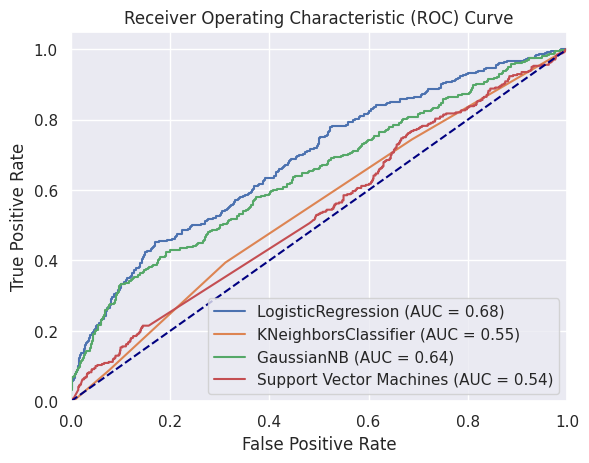

In [28]:
# Create empty lists to store AUC scores
auc_scores = []

# Loop through a list of (model_name, model_instance) tuples
for name, model in models:
    # Fit the model on the entire training data
    model.fit(X_train, y_train)
    # Predict probabilities on the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    # Print the AUC score for the current model
    print('%s: AUC = %f' % (name, roc_auc))
    # Plot ROC curve for the current model
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Customize the ROC curve plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Step 8: Making predictions using the evaluated models

In [41]:
# Assuming selected_features is the list of features obtained from feature selection
selected_features = ['Customer Id', 'Insured_Period', 'Residential', 'Building_Fenced', 'Garden',
                     'Settlement', 'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Geo_Code']

pred_X = test_data[selected_features]

# Define the submission directory
submission_dir = 'gdrive/My Drive/Colab Notebooks/'

# Loop through a list of (model_name, model_instance) tuples
for name, model in models:
    # Fit the model on the entire training dataset
    model.fit(X_train, y_train)

    # Try to set feature names if supported by the model
    try:
        model.feature_names_in_ = selected_features
    except AttributeError:
        pass

    # Predict probabilities on the test dataset using the selected features
    test_pred_proba = model.predict_proba(pred_X)[:, 1]

    # Create a DataFrame for submission
    submission_df = pd.DataFrame({'Customer Id': test_data['Customer Id'], 'Claim': test_pred_proba})

    # Save the submission DataFrame to a CSV file
    submission_path = os.path.join(submission_dir, f'submissions_{name}.csv')
    submission_df.to_csv(submission_path, index=False)

    print(f'Submission file for {name} saved at: {submission_path}')

# No feature name warnings

Submission file for LogisticRegression saved at: gdrive/My Drive/Colab Notebooks/submissions_LogisticRegression.csv
Submission file for KNeighborsClassifier saved at: gdrive/My Drive/Colab Notebooks/submissions_KNeighborsClassifier.csv
Submission file for GaussianNB saved at: gdrive/My Drive/Colab Notebooks/submissions_GaussianNB.csv
Submission file for Support Vector Machines saved at: gdrive/My Drive/Colab Notebooks/submissions_Support Vector Machines.csv
